## Observations and Insights 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="inner")
# Display the data table for preview
combined_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Checking the number of mice.
mice_total = combined_mouse_study_df["Mouse ID"].count()
mice_total

1893

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_study_df[combined_mouse_study_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [87]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = combined_mouse_study_df[combined_mouse_study_df.duplicated('Mouse ID',)]
all_duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_df = combined_mouse_study_df.drop_duplicates("Mouse ID")

In [89]:
# Checking the number of mice in the clean DataFrame.
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#print(mean)
median = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#print(median)
variance = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#print(variance)
standarddeviation = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#print(standardeviation)
sem = combined_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#print(sem)


statistics_summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standarddeviation, "Sem": sem})
statistics_summary

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurement = pd.DataFrame(combined_mouse_study_df.groupby(["Drug Regimen"]).count()).reset_index()

drug_df = drug_measurement[["Drug Regimen", "Mouse ID"]]
drug_df = drug_df.set_index("Drug Regimen")

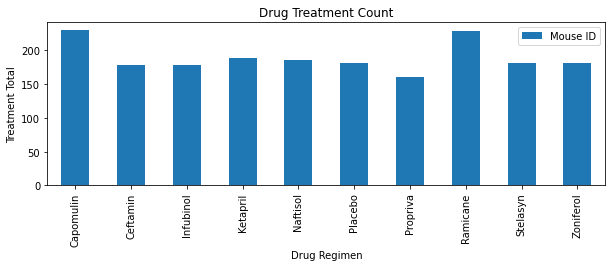

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Treatment Total")
plt.show()

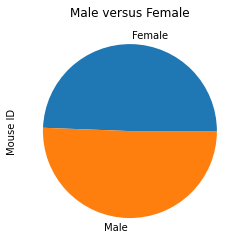

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined_mouse_study_df.groupby('Sex').count()['Mouse ID']
pie_plot = gender.plot.pie(y='Sex',title='Male versus Female')

<function matplotlib.pyplot.show(close=None, block=None)>

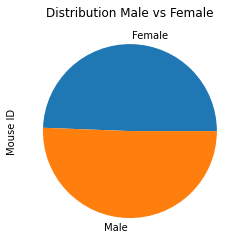

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = combined_mouse_study_df.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender)
gender_df


plt.pie(gender,labels=gender.index);
plt.title('Distribution Male vs Female')
plt.ylabel('Mouse ID')
plt.show

## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = combined_mouse_study_df.loc[combined_mouse_study_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_mouse_study_df.loc[combined_mouse_study_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_mouse_study_df.loc[combined_mouse_study_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_mouse_study_df.loc[combined_mouse_study_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_max = c_df.groupby('Mouse ID').max()['Timepoint']
capomulin_max_df = pd.DataFrame(capomulin_max)
capomulin_max_merge = pd.merge(capomulin_max_df,combined_mouse_study_df,on=("Mouse ID","Timepoint"),how="left")
capomulin_max_merge.head()

ramicane_max = r_df.groupby('Mouse ID').max()['Timepoint']
ramicane_max_df = pd.DataFrame(ramicane_max)
ramicane_max_merge = pd.merge(ramicane_max_df,combined_mouse_study_df,on=("Mouse ID","Timepoint"),how="left")
ramicane_max_merge.head()

infubinol_max = i_df.groupby('Mouse ID').max()['Timepoint']
infubinol_max_df = pd.DataFrame(infubinol_max)
infubinol_max_merge = pd.merge(infubinol_max_df,combined_mouse_study_df,on=("Mouse ID","Timepoint"),how="left")
infubinol_max_merge.head()

ceftamin_max = ce_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_max_df = pd.DataFrame(ceftamin_max)
ceftamin_max_merge = pd.merge(ceftamin_max_df,combined_mouse_study_df,on=("Mouse ID","Timepoint"),how="left")
ceftamin_max_merge.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [124]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
c_tumors = capomulin_max_merge["Tumor Volume (mm3)"]

c_quartiles = c_tumors.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
print(f"Potential outliers for Capomulin could be below {c_lower_bound} and above {c_upper_bound}.")

#Ramicane
r_tumors = ramicane_max_merge["Tumor Volume (mm3)"]

r_quartiles = r_tumors.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Potential outliers for Ramicane could be below {r_lower_bound} and above {r_upper_bound}.")

#Infubinol
i_tumors = infubinol_max_merge["Tumor Volume (mm3)"]

i_quartiles = i_tumors.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq

i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Potential outliers for Infubinol could be below {i_lower_bound} and above {i_upper_bound}.")

#Ceftamin
ce_tumors = ceftamin_max_merge["Tumor Volume (mm3)"]

ce_quartiles = ce_tumors.quantile([.25,.5,.75])
ce_lowerq = ce_quartiles[0.25]
ce_upperq = ce_quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq

ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
print(f"Potential outliers for Infubinol could be below {ce_lower_bound} and above {ce_upper_bound}.")

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

Potential outliers for Capomulin could be below 20.70456164999999 and above 51.83201549.
Potential outliers for Ramicane could be below 17.912664470000003 and above 54.30681135.
Potential outliers for Infubinol could be below 36.83290494999999 and above 82.74144559000001.
Potential outliers for Infubinol could be below 25.355449580000002 and above 87.66645829999999.


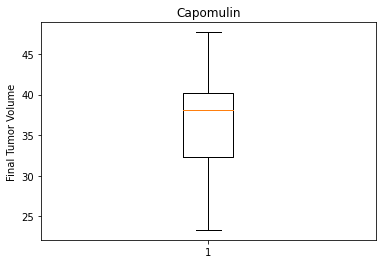

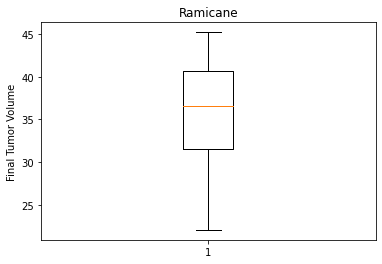

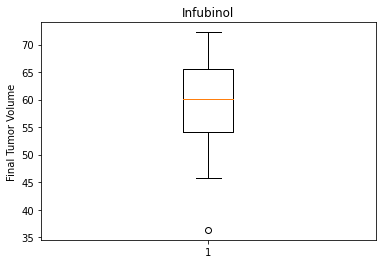

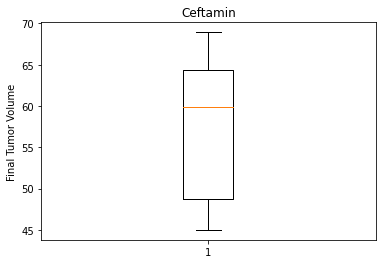

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(c_tumors)
plt.show()

#Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(r_tumors)
plt.show()

#Infubinol
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(i_tumors)
plt.show()

#Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ce_tumors)
plt.show()

## Line and Scatter Plots

In [109]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = c_df.loc[c_df["Mouse ID"] == "m601",:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1


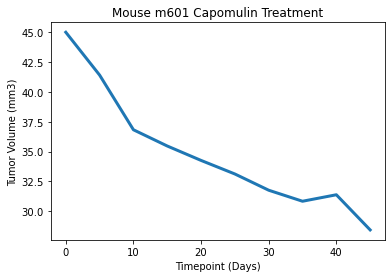

In [123]:
x_axis_tp = line_df["Timepoint"]
tv = line_df["Tumor Volume (mm3)"]
plt.show()

plt.title('Mouse m601 Capomulin Treatment')
plt.plot(x_axis_tp,tv,linewidth=3, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('LinePlotTumorVolumeTimePoint')
plt.show()

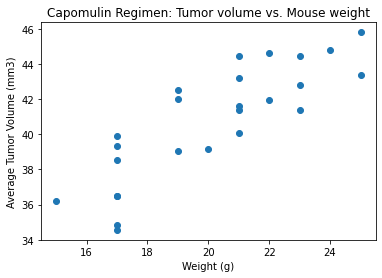

In [113]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df_average = capomulin_df_average.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_df_average['Weight (g)'],capomulin_df_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Regimen: Tumor volume vs. Mouse weight')
plt.savefig('ScatterPlotMouseWeightTumorVolume')
plt.show()

## Correlation and Regression

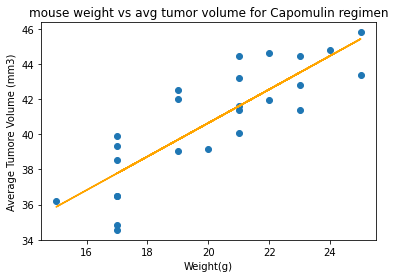

In [122]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
linearregression_model=st.linregress(capomulin_df_average['Weight (g)'],capomulin_df_average['Tumor Volume (mm3)'])
linearregression_model

linearregression_slope = 0.9544396890241045 
linearregression_intercept= 21.552160532685015

y_values = capomulin_df_average['Weight (g)']*linearregressiom_slope+linearregression_intercept
plt.scatter(capomulin_df_average['Weight (g)'],capomulin_df_average['Tumor Volume (mm3)'])

plt.plot(capomulin_df_average['Weight (g)'],y_values,color="orange")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('mouse weight vs avg tumor volume for Capomulin regimen')

plt.savefig('Regression Model')
plt.show()